# Steering stats
For data collected for one lap on the Town04 figure of 8 peripheral road

Dataset Summary:
--------------------------------------------------
Total images: 15840

Steering Angle Statistics:
count    15840.000000
mean         0.000534
std          0.018029
min         -0.077800
25%         -0.007500
50%         -0.000000
75%          0.001700
max          0.158000
Name: steering_angle, dtype: float64


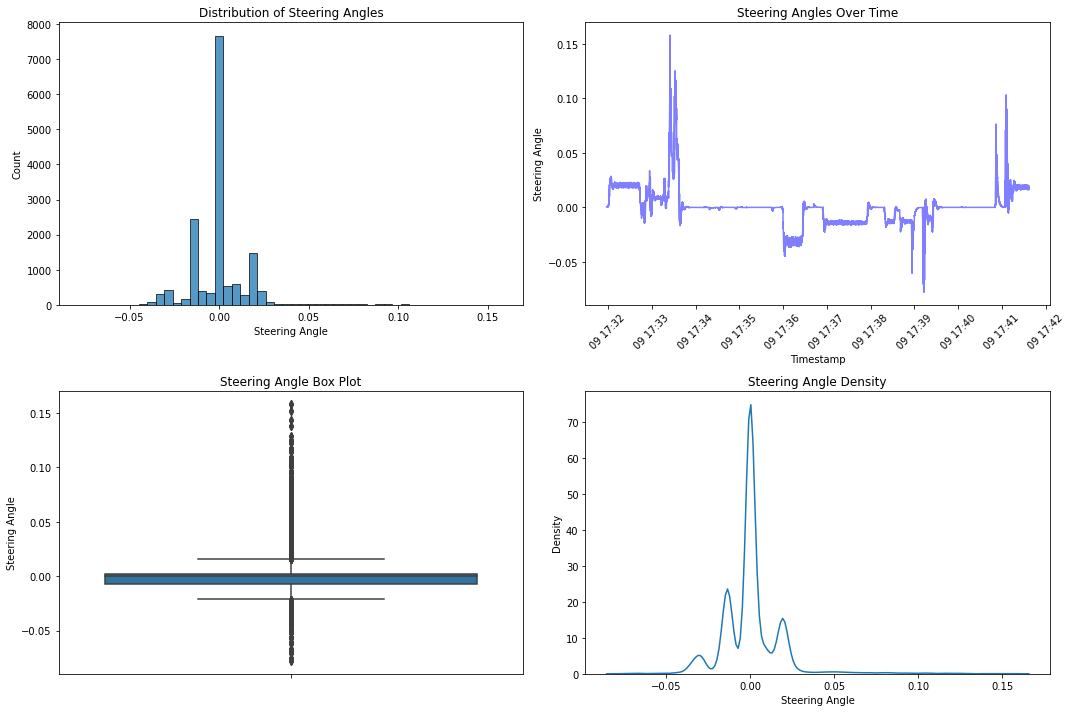


Additional Statistics:
--------------------------------------------------
Absolute mean steering angle: 0.0100
Standard deviation: 0.0180
Maximum absolute steering angle: 0.1580
Percentage of straight driving (|angle| < 0.01): 58.0%


In [1]:
# Analysis of images in carla_dataset directory

import os
import re
from typing import List, Tuple
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def extract_steering_angles(directory: str) -> pd.DataFrame:
    """
    Extract steering angles from image filenames in the specified directory.
    
    Args:
        directory (str): Path to the directory containing the images
        
    Returns:
        pd.DataFrame: DataFrame with columns ['filename', 'steering_angle', 'timestamp']
    """
    # Compile regex pattern for matching steering angle and timestamp in filename
    pattern = r'(\d{8}_\d{6})_\d+_steering_(-?\d+\.\d+)\.jpg$'
    
    steering_data = []
    
    # Walk through directory
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            match = re.search(pattern, filename)
            if match:
                timestamp = pd.to_datetime(match.group(1), format='%Y%m%d_%H%M%S')
                steering_angle = float(match.group(2))
                steering_data.append({
                    'filename': filename,
                    'steering_angle': steering_angle,
                    'timestamp': timestamp
                })
    
    # Create DataFrame and sort by timestamp
    df = pd.DataFrame(steering_data)
    return df.sort_values('timestamp')

# Extract the data
df_steering = extract_steering_angles('carla_dataset')

# Basic statistics
print("Dataset Summary:")
print("-" * 50)
print(f"Total images: {len(df_steering)}")
print("\nSteering Angle Statistics:")
print(df_steering['steering_angle'].describe())

# Create some basic visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Histogram of steering angles
plt.subplot(2, 2, 1)
sns.histplot(data=df_steering, x='steering_angle', bins=50)
plt.title('Distribution of Steering Angles')
plt.xlabel('Steering Angle')
plt.ylabel('Count')

# Plot 2: Steering angles over time
plt.subplot(2, 2, 2)
plt.plot(df_steering['timestamp'], df_steering['steering_angle'], 'b-', alpha=0.5)
plt.title('Steering Angles Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Steering Angle')
plt.xticks(rotation=45)

# Plot 3: Box plot of steering angles
plt.subplot(2, 2, 3)
sns.boxplot(y=df_steering['steering_angle'])
plt.title('Steering Angle Box Plot')
plt.ylabel('Steering Angle')

# Plot 4: KDE plot of steering angles
plt.subplot(2, 2, 4)
sns.kdeplot(data=df_steering, x='steering_angle')
plt.title('Steering Angle Density')
plt.xlabel('Steering Angle')

plt.tight_layout()
plt.show()

# Additional useful statistics
print("\nAdditional Statistics:")
print("-" * 50)
print(f"Absolute mean steering angle: {abs(df_steering['steering_angle']).mean():.4f}")
print(f"Standard deviation: {df_steering['steering_angle'].std():.4f}")
print(f"Maximum absolute steering angle: {abs(df_steering['steering_angle']).max():.4f}")
print(f"Percentage of straight driving (|angle| < 0.01): {(abs(df_steering['steering_angle']) < 0.01).mean() * 100:.1f}%")

# Store the DataFrame in a variable that we can use for further analysis
steering_data = df_steering

## Plot steering data

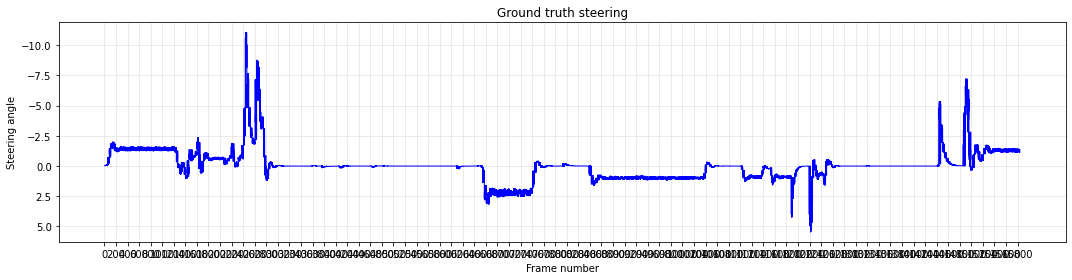

: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_steering_data(steering_data, title="Ground truth steering"):
    # Create figure with specific aspect ratio
    plt.figure(figsize=(15, 4))  # 15:4 aspect ratio
    
    # Convert steering angles from [-1,1] to [-70,70] degrees
    steering_angles_deg = steering_data['steering_angle'] * 70
    
    # Create frame numbers for x-axis
    frame_numbers = np.arange(len(steering_angles_deg))
    
    # Create the plot
    plt.plot(frame_numbers, -steering_angles_deg, 'b-', linewidth=1)  # Note the negative sign to flip y-axis
    
    # Set the axis labels and title
    plt.xlabel('Frame number')
    plt.ylabel('Steering angle')
    plt.title(title)
    
    # Set x-axis ticks in increments of 200
    plt.xticks(np.arange(0, len(frame_numbers), 200))
    
    # Invert y-axis
    plt.gca().invert_yaxis()
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Assuming steering_data DataFrame exists:
plot_steering_data(steering_data)